<a href="https://colab.research.google.com/github/Student-NitinRaj/Machine-learning-PROJECT-HUB/blob/main/Breast_Cancer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_breast_cancer_dataset_path = kagglehub.dataset_download('yasserh/breast-cancer-dataset')

print('Data source import complete.')


Data source import complete.


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv
/kaggle/input/breast-cancer-dataset/.nfs000000003f36b70f0000009e


In [7]:
df=pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.shape

(569, 32)

In [10]:
df.describe().sum()

,0
id,1.077311e+09
radius_mean,6.625923e+02
texture_mean,6.983907e+02
perimeter_mean,1.183068e+03
area_mean,5.974403e+03
smoothness_mean,5.696140e+02
compactness_mean,5.698099e+02
concavity_mean,5.698171e+02
concave points_mean,5.694167e+02
symmetry_mean,5.701554e+02


In [11]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
384,902727,B,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,...,14.24,17.37,96.59,623.7,0.1166,0.2685,0.28660,0.09173,0.2736,0.07320
222,8812844,B,10.18,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,...,11.17,22.84,71.94,375.6,0.1406,0.1440,0.06572,0.05575,0.3055,0.08797
156,8711202,M,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,...,20.47,25.11,132.90,1302.0,0.1418,0.3498,0.35830,0.15150,0.2463,0.07738


In [15]:
pd.set_option("display.max_rows", None)

In [16]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
# check frequency of each column name
print(pd.Series(df.columns).value_counts())

id                         1
diagnosis                  1
radius_mean                1
texture_mean               1
perimeter_mean             1
area_mean                  1
smoothness_mean            1
compactness_mean           1
concavity_mean             1
concave points_mean        1
symmetry_mean              1
fractal_dimension_mean     1
radius_se                  1
texture_se                 1
perimeter_se               1
area_se                    1
smoothness_se              1
compactness_se             1
concavity_se               1
concave points_se          1
symmetry_se                1
fractal_dimension_se       1
radius_worst               1
texture_worst              1
perimeter_worst            1
area_worst                 1
smoothness_worst           1
compactness_worst          1
concavity_worst            1
concave points_worst       1
symmetry_worst             1
fractal_dimension_worst    1
Name: count, dtype: int64


<Axes: xlabel='radius_mean'>

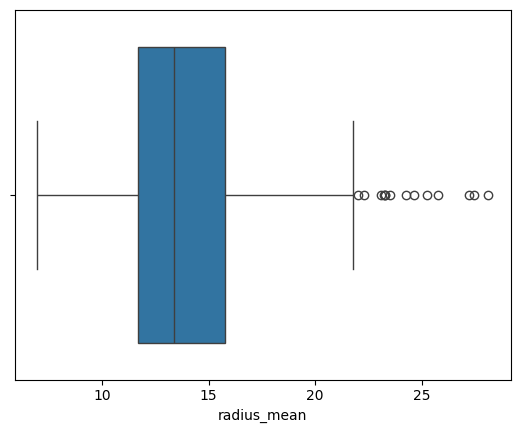

In [18]:
sns.boxplot(x=df["radius_mean"])

In [19]:
df=pd.DataFrame(df)

In [20]:
print(df["radius_mean"].value_counts())

radius_mean
12.340    4
11.060    3
10.260    3
12.770    3
13.050    3
13.850    3
12.180    3
11.600    3
13.000    3
11.710    3
15.460    3
13.170    3
12.460    3
12.890    3
11.890    3
12.450    2
14.250    2
13.660    2
13.460    2
11.760    2
11.270    2
12.880    2
13.210    2
14.990    2
15.780    2
12.270    2
11.130    2
11.040    2
13.400    2
12.210    2
10.570    2
13.900    2
14.530    2
9.742     2
11.540    2
12.760    2
12.540    2
11.840    2
13.870    2
14.580    2
11.520    2
13.640    2
15.100    2
18.220    2
11.940    2
13.590    2
11.260    2
13.280    2
11.740    2
12.830    2
12.620    2
15.750    2
11.220    2
12.360    2
12.000    2
14.640    2
12.470    2
19.530    2
12.870    2
10.480    2
19.400    2
13.200    2
12.720    2
19.550    2
12.050    2
10.800    2
14.970    2
13.770    2
14.860    2
12.300    2
14.220    2
18.310    2
14.420    2
11.080    2
12.860    2
20.180    2
11.800    2
13.110    2
13.610    2
9.876     2
10.490    2
19.590    2
12.2

<Axes: ylabel='texture_mean'>

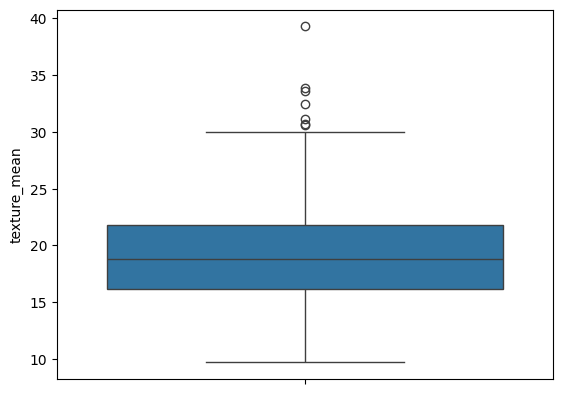

In [52]:
sns.boxplot(df["texture_mean"])

In [22]:
df["texture_mean"].value_counts()

,count
texture_mean,
16.84,3
19.83,3
15.70,3
20.52,3
18.22,3
14.93,3
18.90,3
17.46,3
16.85,3


<Axes: ylabel='perimeter_mean'>

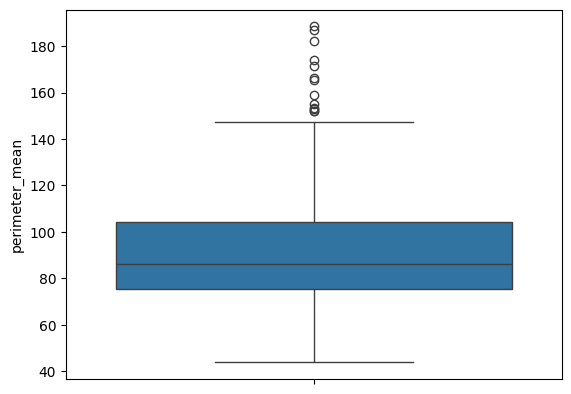

In [23]:
sns.boxplot(df["perimeter_mean"])

<Axes: ylabel='area_mean'>

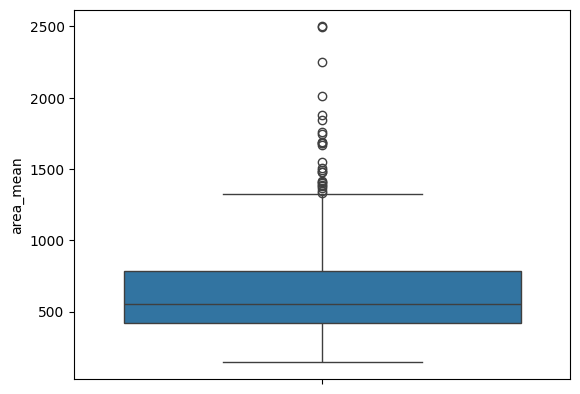

In [24]:
sns.boxplot(df["area_mean"])

<Axes: ylabel='smoothness_mean'>

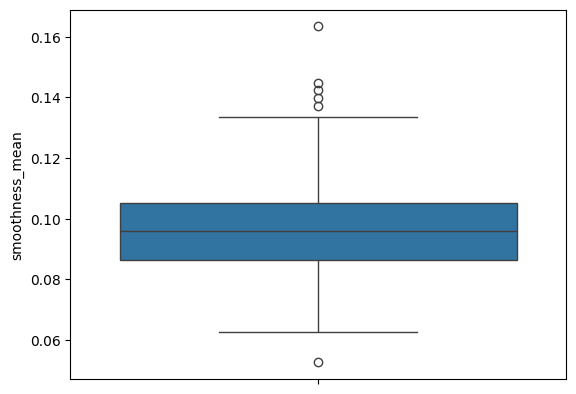

In [25]:
sns.boxplot(df["smoothness_mean"])

<Axes: xlabel='compactness_mean'>

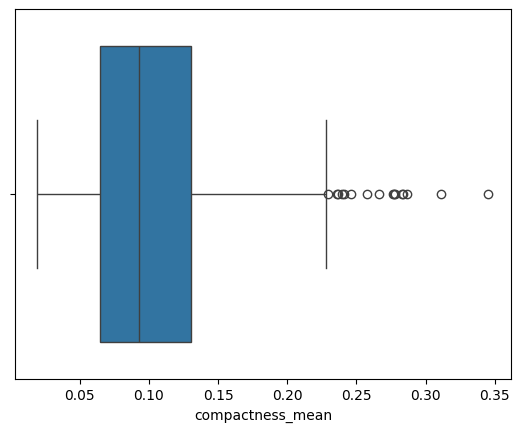

In [26]:
sns.boxplot(x=df["compactness_mean"])

<Axes: xlabel='concavity_mean'>

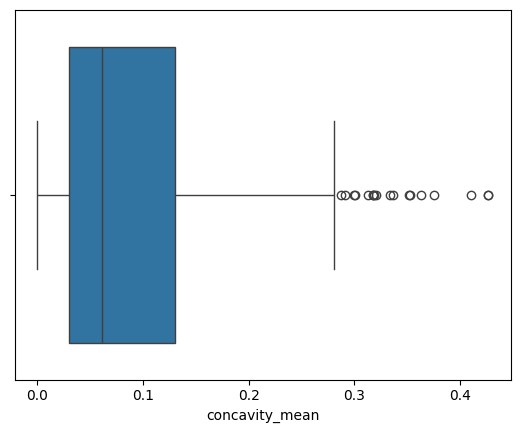

In [27]:
sns.boxplot(x=df["concavity_mean"])

<Axes: xlabel='concave points_mean'>

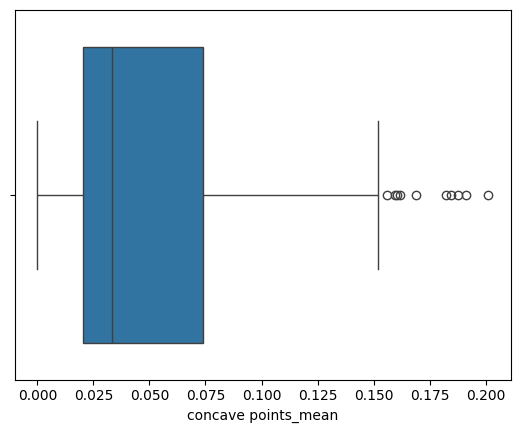

In [28]:
sns.boxplot(x=df["concave points_mean"])

<Axes: xlabel='symmetry_mean'>

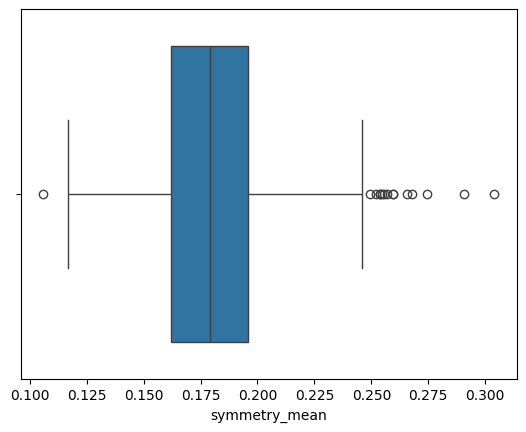

In [29]:
sns.boxplot(x=df["symmetry_mean"])

<Axes: xlabel='smoothness_se'>

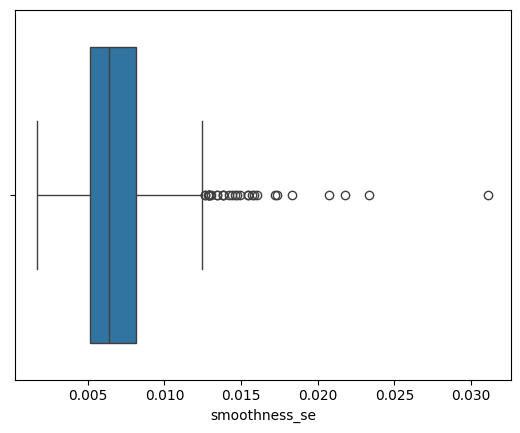

In [53]:
sns.boxplot(x=df["smoothness_se"])

In [54]:
df["smoothness_se"].value_counts()

,count
smoothness_se,
0.005910,2
0.006064,2
0.007189,2
0.007389,2
0.005251,2
0.013800,2
0.005518,2
0.010170,2
0.010000,2


<Axes: xlabel='symmetry_se'>

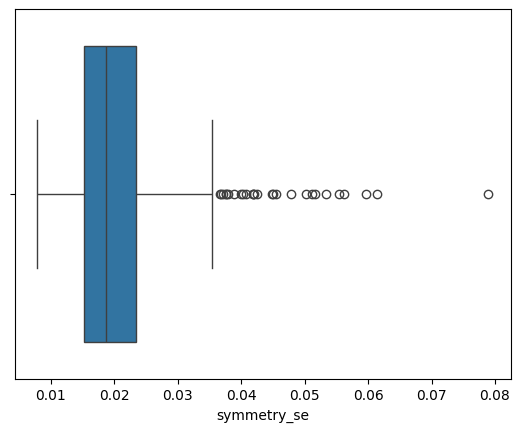

In [55]:
sns.boxplot(x=df["symmetry_se"])

In [57]:
df["symmetry_se"].value_counts()

,count
symmetry_se,
0.013440,4
0.014540,3
0.018840,3
0.018970,3
0.015360,3
0.016470,3
0.019240,3
0.018700,3
0.020450,3


<Axes: xlabel='radius_worst'>

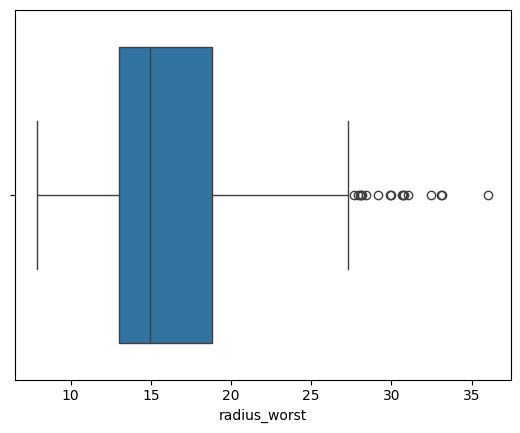

In [58]:
sns.boxplot(x=df["radius_worst"])

<Axes: xlabel='texture_worst'>

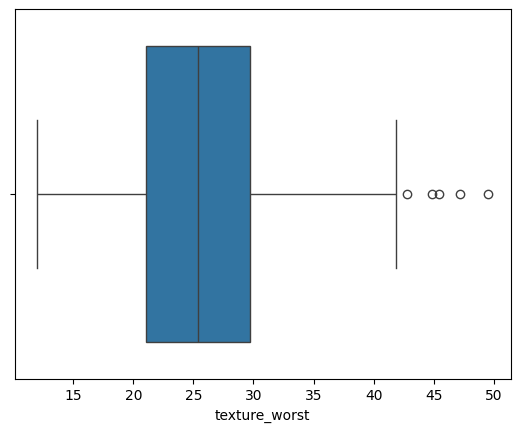

In [59]:
sns.boxplot(x=df["texture_worst"])

<Axes: xlabel='area_worst'>

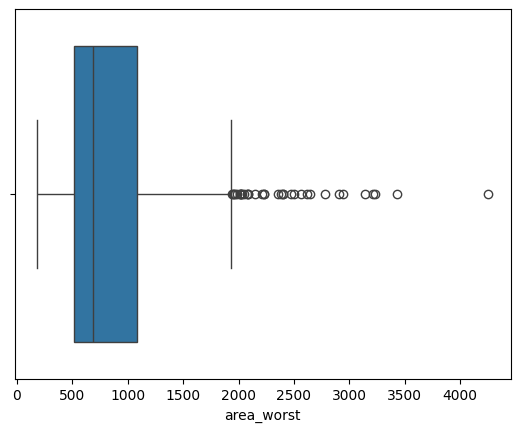

In [34]:
sns.boxplot(x=df["area_worst"])

<Axes: xlabel='smoothness_worst'>

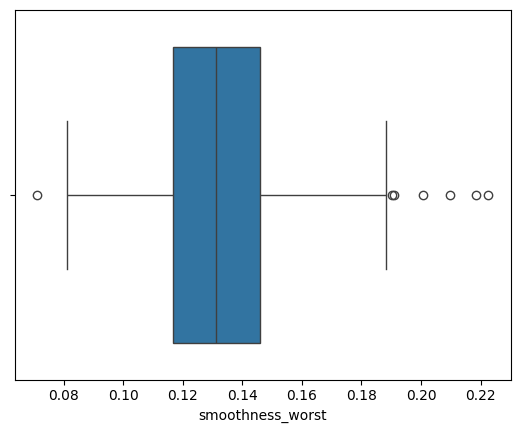

In [35]:
sns.boxplot(x=df["smoothness_worst"])

<Axes: xlabel='symmetry_worst'>

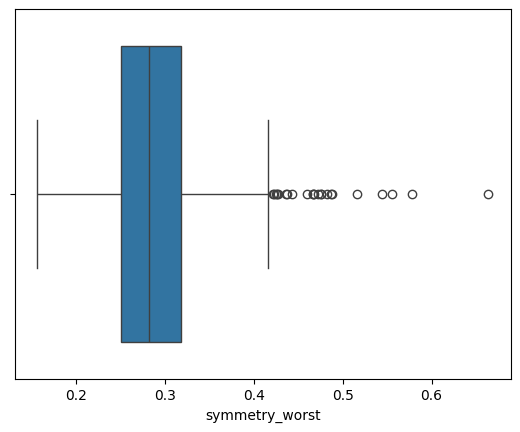

In [36]:
sns.boxplot(x=df["symmetry_worst"])

<Axes: xlabel='concavity_worst'>

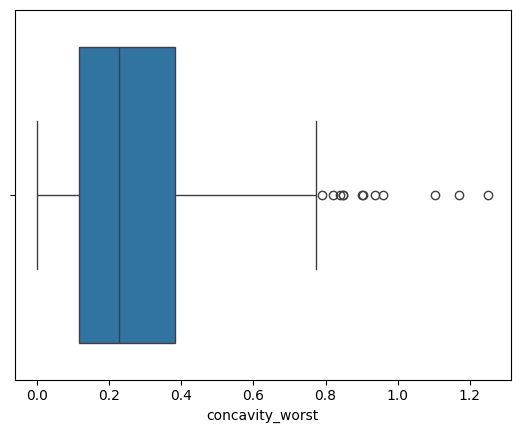

In [37]:
sns.boxplot(x=df["concavity_worst"])

<Axes: xlabel='compactness_worst'>

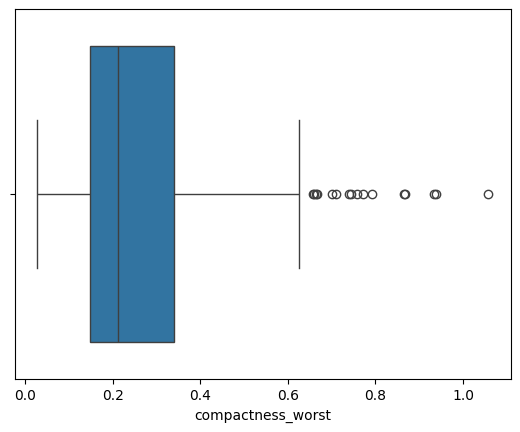

In [38]:
sns.boxplot(x=df["compactness_worst"])

<Axes: xlabel='concave points_worst'>

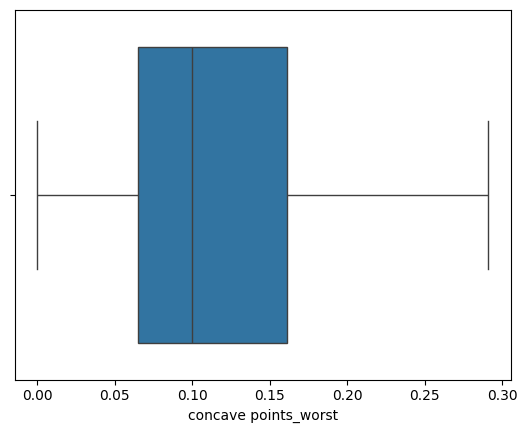

In [39]:
sns.boxplot(x=df["concave points_worst"])

<Axes: xlabel='fractal_dimension_worst'>

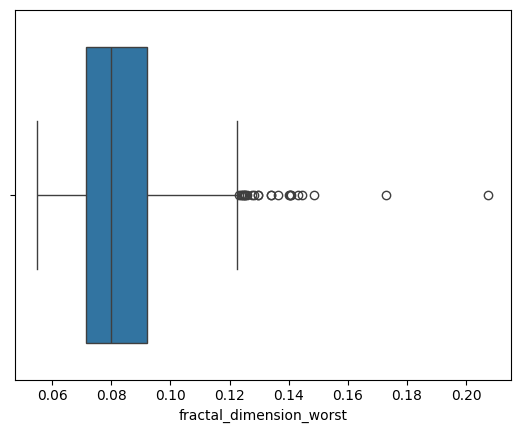

In [40]:
sns.boxplot(x=df["fractal_dimension_worst"])

In [41]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Axes: xlabel='fractal_dimension_mean'>

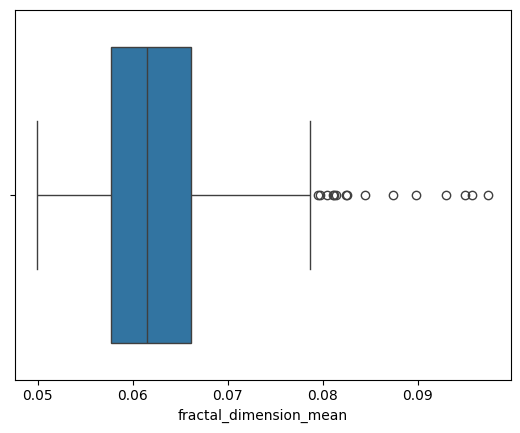

In [42]:
sns.boxplot(x=df["fractal_dimension_mean"])

<Axes: xlabel='radius_se'>

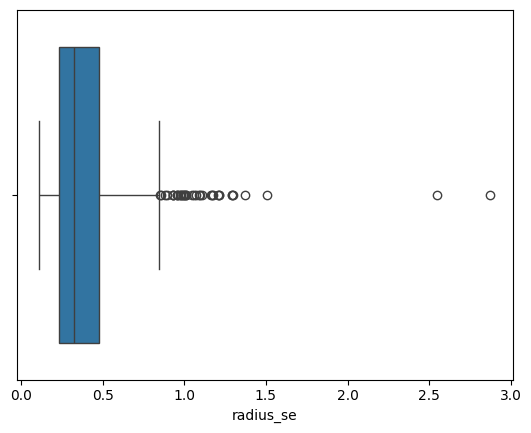

In [43]:
sns.boxplot(x=df["radius_se"])

<Axes: xlabel='texture_se'>

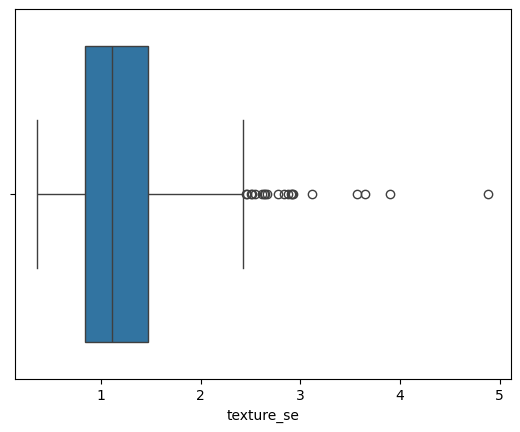

In [44]:
sns.boxplot(x=df["texture_se"])

<Axes: xlabel='perimeter_se'>

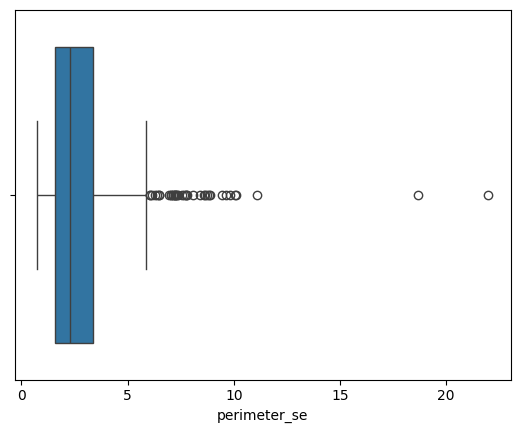

In [45]:
sns.boxplot(x=df["perimeter_se"])

<Axes: xlabel='area_se'>

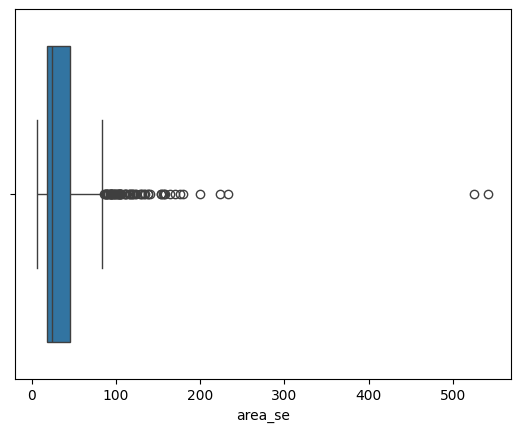

In [46]:
sns.boxplot(x=df["area_se"])

<Axes: xlabel='compactness_se'>

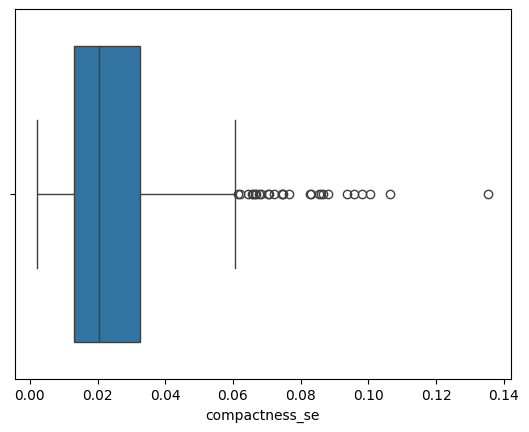

In [47]:
sns.boxplot(x=df["compactness_se"])

<Axes: xlabel='concavity_se'>

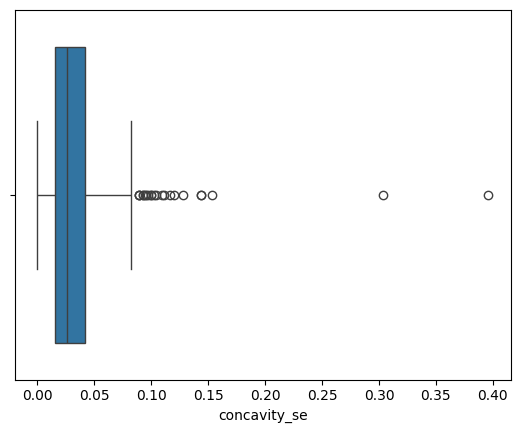

In [48]:
sns.boxplot(x=df["concavity_se"])

<Axes: xlabel='concave points_se'>

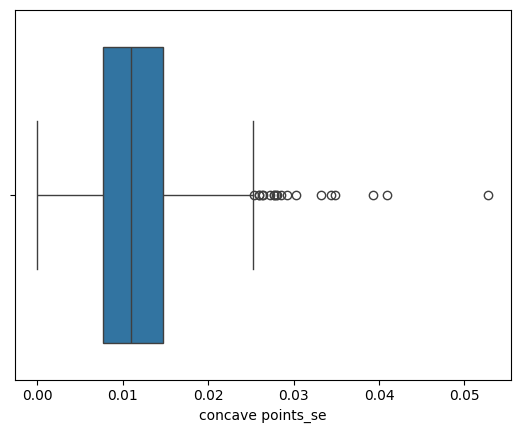

In [49]:
sns.boxplot(x=df["concave points_se"])

<Axes: xlabel='fractal_dimension_se'>

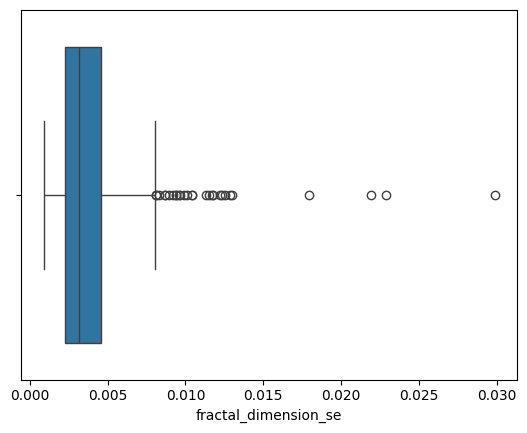

In [50]:
sns.boxplot(x=df["fractal_dimension_se"])

Upper all these columns are not posible to remove outlier b/c all in mean than create problem when model not predict nearest outlier

In [61]:
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
471,9113816,B,12.04,28.14,76.85,449.9,0.08752,0.0600,0.02367,0.02377,...,13.60,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639
370,9012315,M,16.35,23.29,109.00,840.4,0.09742,0.1497,0.18110,0.08773,...,19.38,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614
81,8611161,B,13.34,15.86,86.49,520.0,0.10780,0.1535,0.11690,0.06987,...,15.53,23.19,96.66,614.9,0.1536,0.47910,0.48580,0.17080,0.3527,0.10160


In [71]:
x = df.drop(columns=['id', 'diagnosis'])  # Dropping the target column
y = df['diagnosis']

In [91]:
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
396,90401601,B,13.51,18.89,88.1,558.1,0.1059,0.1147,0.0858,0.05381,...,14.80,27.2,97.33,675.2,0.1428,0.2570,0.3438,0.1453,0.2666,0.07686
118,864877,M,15.78,22.91,105.7,782.6,0.1155,0.1752,0.2133,0.09479,...,20.19,30.5,130.30,1272.0,0.1855,0.4925,0.7356,0.2034,0.3274,0.12520
516,916799,M,18.31,20.58,120.8,1052.0,0.1068,0.1248,0.1569,0.09451,...,21.86,26.2,142.20,1493.0,0.1492,0.2536,0.3759,0.1510,0.3074,0.07863


In [72]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert back to DataFrame (optional, for easier handling)
X_scaled = pd.DataFrame(x_scaled, columns=x.columns)
X_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [97]:
train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,test_size=0.2)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Model training
lr = LogisticRegression()
lr.fit(train_x, train_y)

# Prediction
y_pred = lr.predict(test_x)

In [99]:
# Evaluation
print("Logistic Regression (Full Features)")
print("Accuracy:", accuracy_score(test_y, y_pred))
print("Classification Report:\n", classification_report(test_y, y_pred))

Logistic Regression (Full Features)
Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           B       1.00      0.99      0.99        81
           M       0.97      1.00      0.99        33

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [105]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf.predict(test_x)

In [106]:
# Evaluation
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(test_y, y_pred))
print("Classification Report:\n", classification_report(test_y, y_pred))

Random Forest Classifier
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.99      0.99        81
           M       0.97      0.97      0.97        33

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



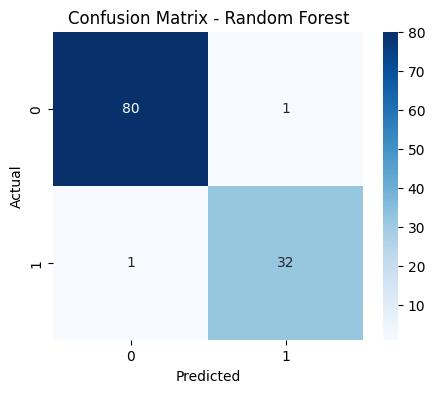

In [104]:
# Confusion Matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Logistic Regression Acquracy score is 99%+ and Random Forest is 98% but if reach 100% than here model id more validate b.e it's cause problem when 1 wrong prediction

In [109]:
from ast import pattern
from mlxtend.plotting import plot_decision_regions

In [110]:
import pickle

In [112]:
pickle.dump(rf,open('model.pkl','wb'))